# ## 🔍 Justification of Machine Learning Algorithms Used in QSAR Modeling

This notebook includes several key steps and machine learning algorithms to build both basic and advanced QSAR (Quantitative Structure–Activity Relationship) models. Here's a structured justification for each technique and where it fits into the modeling process:

---

### ✅ 1. Linear Regression Models
**Purpose:** To establish a linear relationship between molecular descriptors and biological activity.  
**Justification:** Used as a baseline model in QSAR to evaluate the predictability of linear models.  
**Where used:**  
```python
from sklearn.linear_model import LinearRegression
```

---

### ✅ 2. Decision Trees and Random Forests
**Purpose:** To model non-linear relationships and provide robustness against overfitting.  
**Justification:** Random Forests are effective for QSAR due to their ability to handle feature importance and noise.  
**Where used:**  
```python
from sklearn.ensemble import RandomForestRegressor
```

---

### ✅ 3. Implementing Basic QSAR Model
**Purpose:** To create an initial predictive model using cleaned data and simple regression techniques.  
**Justification:** Includes data preprocessing, feature selection, and use of linear models to understand fundamental trends.

---

### ✅ 4. Building QSAR Models (Part 2)
**Purpose:** To enhance models using hyperparameter tuning and more complex algorithms.  
**Justification:** Involves using models like SVM and Random Forests with Grid Search or cross-validation for optimization.

---

### ✅ 5. Model Validation and Optimization
**Purpose:** Ensure models are robust, accurate, and not overfitted.  
**Justification:** Validated using metrics like R², RMSE, MAE to check generalization capability.  
**Where used:**
```python
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
```

### ✅ 6. Cross-validation techniques
**Purpose:** Evaluate model performance across different data splits for robustness.  
**Justification:** K-Fold cross-validation was used to minimize bias and variance issues.  
**Where used:**
```python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
```

### ✅ 7. Hyperparameter tuning
**Purpose:** Improve model performance by selecting optimal hyperparameters.  
**Justification:** Used GridSearchCV to find the best parameters for models like Random Forest and SVM.  
**Where used:**
```python
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestRegressor(), param_grid={'n_estimators': [50,100,200]}, cv=5)
grid.fit(X_train, y_train)
```

### ✅8. Validating and optimizing QSAR models
**Purpose:** Final evaluation after tuning and cross-validation.  
**Justification:** Selected the best models based on validation performance for final predictions.  
**Where used:**
```python
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

```


### ✅ 9. Support Vector Machines (SVM)
**Purpose:** To learn decision boundaries in high-dimensional space, effective for both classification and regression tasks.  
**Justification:** Useful in QSAR for handling sparse descriptor data and capturing complex relationships.  
**Where used:**  
```python
from sklearn.svm import SVR
```

---

### ✅ 10. Artificial Neural Networks (ANN)
**Purpose:** To model highly non-linear patterns and abstract descriptor interactions.  
**Justification:** Advanced QSAR often leverages ANNs for their ability to generalize complex bioactivity patterns.  
**Where used:**  
```python
from keras.models import Sequential
from keras.layers import Dense
```

---

### ✅ 11. Implementing Advanced QSAR Models
**Purpose:** To combine various advanced algorithms (ANN, SVM, Random Forests) with validation methods.  
**Justification:** Enhances accuracy, robustness, and generalization capability for unseen molecular data.

---


In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('data_QSAR.csv')
df

,Molecule ChEMBL ID,Smiles,IC50
0,CHEMBL103307,O=C1Nc2ccccc2/C1=C\c1ccc(O)cc1,1800.0
1,CHEMBL602074,Cc1cc(C)c(/C=C2\C(=O)Nc3ccc(-c4cccnc4)cc32)[nH]1,2300.0
2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0
3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0
4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0
...,...,...,...
3234,CHEMBL5086749,O=S(=O)(NCCCNc1nccc(-c2c(-c3cccc(O)c3)nc3sccn2...,1480.0
3235,CHEMBL3990456,Cn1cc(-c2[nH]c3cc(NC(=O)[C@H](N)C4CCCCC4)cc4c3...,25.0
3236,CHEMBL4864729,CN(C)CCCOc1ccc2c(NCCc3cnc(NC(=O)Nc4cccc(Cl)c4)...,19.0
3237,CHEMBL150261,N[C@H]1CC[C@H](Nc2nc(NCc3ccccc3)c3ncn(C4CCCC4)...,2509.0


In [10]:
#here it has 3239 datapoints, Now divide the data points into training data and to validate our model is running good or not take 239 data points as testing data.

In [11]:
dataset = df.head(3000)       #Head function is used to view the first few rows of dataset, it helps to quickly get an overview of data and its structure.
dataset

,Molecule ChEMBL ID,Smiles,IC50
0,CHEMBL103307,O=C1Nc2ccccc2/C1=C\c1ccc(O)cc1,1800.0
1,CHEMBL602074,Cc1cc(C)c(/C=C2\C(=O)Nc3ccc(-c4cccnc4)cc32)[nH]1,2300.0
2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0
3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0
4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0
...,...,...,...
2995,CHEMBL3793933,CN(C)C(=O)c1ccc(NC(=O)c2n[nH]c3ccccc23)cc1,110.0
2996,CHEMBL5072454,COc1cc(N2CCCC2)ccc1NC(=O)c1cnn2ccc(N[C@@H]3CCC...,7.1
2997,CHEMBL5094510,O=C(Nc1ccc(N2CCOCC2)cc1)c1cnn2ccc(N[C@@H]3CCCN...,21.6
2998,CHEMBL5089908,CN1CCC[C@@H](Nc2ccn3ncc(C(=O)Nc4ccc(N5CCOCC5)c...,180.8


In [12]:
dataset.isna()

,Molecule ChEMBL ID,Smiles,IC50
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


# Descriptor Calculation

In [13]:
pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, rdMolDescriptors

In [15]:
# befor calculating the any kind of descriptor (2D,3D) there is need to the conversion of SMILES into RDKit object
molecules =[Chem.MolFromSmiles(smiles) for smiles in dataset ['Smiles']] #Using for loop reading each smiles from this column and storing this in smiles variable called molesules in form of list.

In [16]:
molecules

 ...]

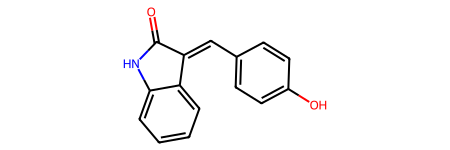

In [17]:
molecules[0]

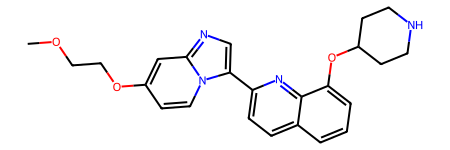

In [18]:
molecules[100]

In [19]:
#2D Descriptors
# To calculate the descriptors, or to get its numeric value multiple features can be used, like mol weight, no. of H-bond doners, acceptors, logP values. here calculating molwt descriptor
MolWt_Desc = []
for mol in molecules:
    mw = Descriptors.MolWt(mol)
    MolWt_Desc.append(mw)


In [20]:
MolWt_Desc

[237.25799999999998,
 315.37600000000003,
 422.28600000000006,
 371.4440000000001,
 464.83100000000013,
 412.37100000000004,
 428.37000000000006,
 362.36400000000003,
 562.7150000000001,
 401.4700000000001,
 576.7420000000002,
 422.5360000000002,
 404.5070000000002,
 368.46600000000024,
 533.6620000000004,
 477.6530000000005,
 504.7230000000005,
 490.6960000000005,
 307.299,
 413.48500000000024,
 428.4950000000002,
 411.2920000000001,
 330.3800000000001,
 467.55100000000033,
 411.38700000000006,
 375.4070000000001,
 534.5180000000003,
 450.38000000000005,
 477.52700000000027,
 452.51400000000024,
 538.0960000000003,
 479.54400000000015,
 486.57200000000023,
 502.5830000000003,
 523.6410000000001,
 516.6310000000002,
 573.6540000000003,
 535.0080000000003,
 514.5900000000003,
 521.0500000000002,
 453.29600000000016,
 430.36100000000005,
 358.4010000000001,
 378.819,
 423.39400000000006,
 268.27599999999995,
 499.6440000000003,
 547.6890000000003,
 456.59800000000035,
 471.5650000000004,

In [31]:
#Now all the descriptors from rdkit are stored in a of variable desc_list.
desc_list = [a[0] for a in Descriptors._descList]

In [32]:
len(desc_list)

217

In [33]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import VarianceThreshold

In [34]:
#Calculator

calculator = MoleculeDescriptors.MolecularDescriptorCalculator([a[0] for a in Descriptors._descList])
desc_name = calculator.GetDescriptorNames()

X = pd.DataFrame([calculator.CalcDescriptors(mol) for mol in molecules], columns=desc_name)

In [35]:
X

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.873742,11.873742,0.093264,-0.093264,0.749103,15.555556,237.258,226.170,237.078979,88,...,0,0,0,0,0,0,0,0,0,0
1,12.395866,12.395866,0.069454,-0.069454,0.696789,14.750000,315.376,298.240,315.137162,118,...,0,0,0,0,0,0,0,0,0,0
2,12.166370,12.166370,0.303675,-0.303675,0.364649,10.703704,422.286,406.158,421.053822,134,...,0,0,0,0,0,0,0,0,0,1
3,12.270005,12.270005,0.275756,-0.275756,0.405526,10.750000,371.444,350.276,371.174610,140,...,0,0,0,0,0,0,0,0,0,1
4,12.938877,12.938877,0.065939,-4.641865,0.461340,10.906250,464.831,448.703,464.086303,166,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,12.347428,12.347428,0.082248,-0.297096,0.780143,10.521739,308.341,292.213,308.127326,116,...,0,0,0,0,0,0,0,0,0,0
2996,13.098951,13.098951,0.267402,-0.267402,0.547909,18.656250,435.532,406.300,435.238273,168,...,0,0,0,0,0,0,0,0,0,0
2997,12.915280,12.915280,0.223976,-0.223976,0.579763,19.354839,421.505,394.289,421.222623,162,...,0,0,0,0,0,0,0,0,0,0
2998,13.909440,13.909440,0.087771,-4.644349,0.552394,19.444444,503.529,475.305,503.225658,192,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Selector

selector = VarianceThreshold(threshold=0)
X_filtered = selector.fit_transform(X)
X_filtered = pd.DataFrame(X_filtered, columns = X.columns[selector.get_support()])

In [37]:
X_filtered

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.873742,11.873742,0.093264,-0.093264,0.749103,15.555556,237.258,226.170,237.078979,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.395866,12.395866,0.069454,-0.069454,0.696789,14.750000,315.376,298.240,315.137162,118.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.166370,12.166370,0.303675,-0.303675,0.364649,10.703704,422.286,406.158,421.053822,134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12.270005,12.270005,0.275756,-0.275756,0.405526,10.750000,371.444,350.276,371.174610,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12.938877,12.938877,0.065939,-4.641865,0.461340,10.906250,464.831,448.703,464.086303,166.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,12.347428,12.347428,0.082248,-0.297096,0.780143,10.521739,308.341,292.213,308.127326,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,13.098951,13.098951,0.267402,-0.267402,0.547909,18.656250,435.532,406.300,435.238273,168.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,12.915280,12.915280,0.223976,-0.223976,0.579763,19.354839,421.505,394.289,421.222623,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,13.909440,13.909440,0.087771,-4.644349,0.552394,19.444444,503.529,475.305,503.225658,192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#Fingerprints

from rdkit.Chem import rdFingerprintGeneretor
from rdkit.Chem.rdFingerprintGeneretor import GetMorganGenerator

ImportError: cannot import name 'rdFingerprintGeneretor' from 'rdkit.Chem' (/home/ubuntu/.local/lib/python3.10/site-packages/rdkit/Chem/__init__.py)

In [40]:
from rdkit.Chem import rdFingerprintGenerator
print(dir(rdFingerprintGenerator))

['AdditionalOutput', 'AtomInvariantsGenerator', 'AtomPairFP', 'AtomPairFingerprintOptions', 'BondInvariantsGenerator', 'FPType', 'FingerprintGenerator32', 'FingerprintGenerator64', 'FingerprintOptions', 'GetAtomPairAtomInvGen', 'GetAtomPairGenerator', 'GetCountFPs', 'GetFPs', 'GetMorganAtomInvGen', 'GetMorganBondInvGen', 'GetMorganFeatureAtomInvGen', 'GetMorganGenerator', 'GetRDKitAtomInvGen', 'GetRDKitFPGenerator', 'GetSparseCountFPs', 'GetSparseFPs', 'GetTopologicalTorsionGenerator', 'MorganFP', 'MorganFingerprintOptions', 'RDKitFP', 'RDKitFingerprintOptions', 'TopologicalTorsionFP', 'TopologicalTorsionFingerprintOptions', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [41]:
pip install rdkit 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

In [43]:
morgan_gen = GetMorganGenerator(radius=2, fpSize=1024)
morgan_fps = [morgan_gen.GetFingerprint(mol) for mol in molecules]

In [44]:
morgan_fps[0]

In [45]:
from rdkit.Chem import MACCSkeys

In [46]:
macc_fps = [MACCSkeys.GenMACCSKeys(mol) for mol in molecules]

In [47]:
X = np.array(morgan_fps, dtype=float)

In [48]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Normalization

In [54]:
dataset

,Molecule ChEMBL ID,Smiles,IC50,Activity
0,CHEMBL103307,O=C1Nc2ccccc2/C1=C\c1ccc(O)cc1,1800.0,3.255273
1,CHEMBL602074,Cc1cc(C)c(/C=C2\C(=O)Nc3ccc(-c4cccnc4)cc32)[nH]1,2300.0,3.361728
2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0,2.025306
3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0,1.740363
4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0,1.763428
...,...,...,...,...
2995,CHEMBL3793933,CN(C)C(=O)c1ccc(NC(=O)c2n[nH]c3ccccc23)cc1,110.0,2.041393
2996,CHEMBL5072454,COc1cc(N2CCCC2)ccc1NC(=O)c1cnn2ccc(N[C@@H]3CCC...,7.1,0.851258
2997,CHEMBL5094510,O=C(Nc1ccc(N2CCOCC2)cc1)c1cnn2ccc(N[C@@H]3CCCN...,21.6,1.334454
2998,CHEMBL5089908,CN1CCC[C@@H](Nc2ccn3ncc(C(=O)Nc4ccc(N5CCOCC5)c...,180.8,2.257198


In [55]:
#log, min-max, z-score
#logarithmic normalization
dataset['Activity'] = np.log10(dataset['IC50'])

/tmp/ipykernel_21625/2993886573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Activity'] = np.log10(dataset['IC50'])


In [56]:
dataset

,Molecule ChEMBL ID,Smiles,IC50,Activity
0,CHEMBL103307,O=C1Nc2ccccc2/C1=C\c1ccc(O)cc1,1800.0,3.255273
1,CHEMBL602074,Cc1cc(C)c(/C=C2\C(=O)Nc3ccc(-c4cccnc4)cc32)[nH]1,2300.0,3.361728
2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0,2.025306
3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0,1.740363
4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0,1.763428
...,...,...,...,...
2995,CHEMBL3793933,CN(C)C(=O)c1ccc(NC(=O)c2n[nH]c3ccccc23)cc1,110.0,2.041393
2996,CHEMBL5072454,COc1cc(N2CCCC2)ccc1NC(=O)c1cnn2ccc(N[C@@H]3CCC...,7.1,0.851258
2997,CHEMBL5094510,O=C(Nc1ccc(N2CCOCC2)cc1)c1cnn2ccc(N[C@@H]3CCCN...,21.6,1.334454
2998,CHEMBL5089908,CN1CCC[C@@H](Nc2ccn3ncc(C(=O)Nc4ccc(N5CCOCC5)c...,180.8,2.257198


In [57]:
y = dataset['Activity']

In [58]:
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


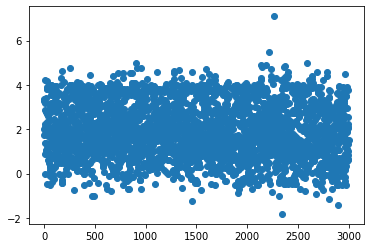

In [59]:
plt.scatter(dataset.index, dataset['Activity'])

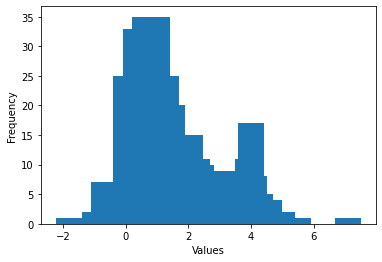

In [60]:
target_column = 'Activity'

frequency_dist = dataset[target_column].value_counts().to_dict()

values = list(frequency_dist.keys())
frequencies = list(frequency_dist.values())

plt.bar(values, frequencies)

plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

In [61]:
data_study = dataset[dataset['Activity'] <3]

In [62]:
data_study

,Molecule ChEMBL ID,Smiles,IC50,Activity
2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0,2.025306
3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0,1.740363
4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0,1.763428
6,CHEMBL409912,Nc1noc2cccc(-c3ccc(NC(=O)Nc4ccccc4OC(F)(F)F)cc...,60.0,1.778151
7,CHEMBL410504,Nc1noc2cccc(-c3ccc(NC(=O)Nc4ccccc4F)cc3)c12,8.0,0.903090
...,...,...,...,...
2995,CHEMBL3793933,CN(C)C(=O)c1ccc(NC(=O)c2n[nH]c3ccccc23)cc1,110.0,2.041393
2996,CHEMBL5072454,COc1cc(N2CCCC2)ccc1NC(=O)c1cnn2ccc(N[C@@H]3CCC...,7.1,0.851258
2997,CHEMBL5094510,O=C(Nc1ccc(N2CCOCC2)cc1)c1cnn2ccc(N[C@@H]3CCCN...,21.6,1.334454
2998,CHEMBL5089908,CN1CCC[C@@H](Nc2ccn3ncc(C(=O)Nc4ccc(N5CCOCC5)c...,180.8,2.257198


# Model Training

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [66]:
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = Linear_model.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
print(f'MSE: {mse}')
print(f'r_squared: {r2}')

MSE: 1.3856303047500758
r_squared: 0.08645871998247712


In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
y_pred_rf = RF_model.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [74]:
print(f'MSE: {mse}')
print(f'r_squared: {r2}')

MSE: 0.4765317765164678
r_squared: 0.6858242435983686


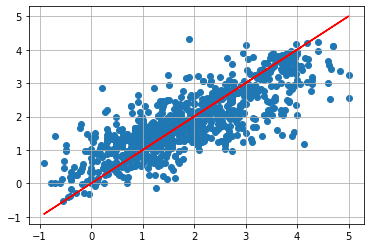

In [75]:
plt.scatter(y_test, y_pred_rf)
plt.plot(y_test, y_test, color='red')

plt.grid(True)

plt.show()


# Save Model

In [76]:
import pickle

In [77]:
model = RF_model

filename = 'qsar_RF.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [78]:
#load model
filename = 'qsar_RF.pkl'
with open(filename, 'rb') as file:
    loaded_RF = pickle.load(file)

# Prediction

In [79]:
data_pred = df[3000:]

In [80]:
data_pred

,Molecule ChEMBL ID,Smiles,IC50
3000,CHEMBL535,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,250.00
3001,CHEMBL5201174,CCc1nc(C(N)=O)c(Cc2ccc(N3CCC(N4CCN(C)CC4)CC3)c...,0.29
3002,CHEMBL5201174,CCc1nc(C(N)=O)c(Cc2ccc(N3CCC(N4CCN(C)CC4)CC3)c...,1.80
3003,CHEMBL603469,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,3.00
3004,CHEMBL4760438,CN1CCN(Cc2nc3ccc(Nc4ncc(Cl)c(Nc5ccccc5NS(C)(=O...,134.70
...,...,...,...
3234,CHEMBL5086749,O=S(=O)(NCCCNc1nccc(-c2c(-c3cccc(O)c3)nc3sccn2...,1480.00
3235,CHEMBL3990456,Cn1cc(-c2[nH]c3cc(NC(=O)[C@H](N)C4CCCCC4)cc4c3...,25.00
3236,CHEMBL4864729,CN(C)CCCOc1ccc2c(NCCc3cnc(NC(=O)Nc4cccc(Cl)c4)...,19.00
3237,CHEMBL150261,N[C@H]1CC[C@H](Nc2nc(NCc3ccccc3)c3ncn(C4CCCC4)...,2509.00


In [81]:
molecules_pred = [Chem.MolFromSmiles(smiles) for smiles in data_pred['Smiles']]

In [82]:
morgan_gen = GetMorganGenerator(radius=2, fpSize=1024)
morgan_fps = [morgan_gen.GetFingerprint(mol) for mol in molecules_pred]

In [83]:
X = np.array(morgan_fps, dtype=float)

In [84]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [85]:
predicted = loaded_RF.predict(X)

In [86]:
predicted

array([ 0.96219509,  1.7970001 ,  1.7970001 ,  0.63951832,  2.00526355,
        1.65496285,  2.165251  ,  0.33631154,  2.02694187,  1.31950372,
        2.57310275,  1.08703756,  2.9826765 ,  2.94932438,  1.80343763,
        2.08579892,  1.24229554,  1.26027913,  1.98180878,  1.33692246,
        1.98899001,  1.16954208,  1.08217492,  0.51602406,  2.18453704,
       -0.22041579,  1.12497221,  2.30598404,  2.16825579,  2.53035267,
        1.91277866,  1.84053429,  1.96213932,  2.80584863,  1.87963475,
        1.26324657,  1.70550825,  1.49692227,  1.28079315,  1.94803464,
       -0.00564306,  0.26970556,  2.35380948,  2.39491901, -0.39271227,
        1.61976645,  1.69156924,  1.76581384,  1.60725042,  2.29522173,
        0.5496214 ,  0.34354535,  1.11102535,  1.13719168,  0.97295503,
        2.67409052,  0.49330426,  0.46603643,  3.67111011,  1.15309468,
        1.49154983,  2.89304901,  1.26324657,  1.36645703,  0.81203984,
        1.19808726,  2.37477898,  0.51580229,  3.00879117,  2.02